In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score , mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [2]:
data = pd.read_csv(r'C:\Users\rutto\OneDrive\Desktop\medi-hack\MediCare\ml\dataset.csv')
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [3]:
data.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

In [38]:
data.shape 

(349, 9)

In [4]:
data.describe()

,Age
count,349.000000
mean,46.323782
std,13.085090
min,19.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,90.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [6]:
data.tail()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive
348,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [7]:
data.shape

(349, 10)

In [6]:
data.duplicated().sum()

np.int64(49)

In [7]:
data.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [8]:
list(data.columns)

['Disease',
 'Fever',
 'Cough',
 'Fatigue',
 'Difficulty Breathing',
 'Age',
 'Gender',
 'Blood Pressure',
 'Cholesterol Level',
 'Outcome Variable']

In [10]:
data.columns.duplicated()


array([False, False, False, False, False, False, False, False, False,
       False])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [10]:
data.drop(columns=['Outcome Variable'],inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
dtypes: int64(1), object(8)
memory usage: 24.7+ KB


In [12]:
# data segragation into numerical and categorical 

cat_columns = data.columns[data.dtypes =='object']
cat_columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Gender', 'Blood Pressure', 'Cholesterol Level'],
      dtype='object')

In [13]:
num_columns = data.columns[data.dtypes!='object']
num_columns


Index(['Age'], dtype='object')

In [14]:
for i in cat_columns:
    print(data[i].value_counts())
    print("----------------------------------")

Disease
Asthma               23
Stroke               16
Osteoporosis         14
Diabetes             10
Hypertension         10
                     ..
Schizophrenia         1
Gout                  1
Testicular Cancer     1
Tonsillitis           1
Williams Syndrome     1
Name: count, Length: 116, dtype: int64
----------------------------------
Fever
Yes    175
No     174
Name: count, dtype: int64
----------------------------------
Cough
No     182
Yes    167
Name: count, dtype: int64
----------------------------------
Fatigue
Yes    242
No     107
Name: count, dtype: int64
----------------------------------
Difficulty Breathing
No     261
Yes     88
Name: count, dtype: int64
----------------------------------
Gender
Female    176
Male      173
Name: count, dtype: int64
----------------------------------
Blood Pressure
High      167
Normal    164
Low        18
Name: count, dtype: int64
----------------------------------
Cholesterol Level
High      166
Normal    149
Low        34
Name: c

In [16]:
data.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_columns:
    data[col] = le.fit_transform(data[col])



In [ ]:
X = data.drop('Disease',axis=1)
y = data['Disease']
print(X)
print(y)

     Fever  Cough  Fatigue  Difficulty Breathing  Age  Gender  Blood Pressure  \
0        1      0        1                     1   19       0               1   
1        0      1        1                     0   25       0               2   
2        0      1        1                     0   25       0               2   
3        1      1        0                     1   25       1               2   
4        1      1        0                     1   25       1               2   
..     ...    ...      ...                   ...  ...     ...             ...   
344      1      0        1                     0   80       0               0   
345      1      0        1                     0   85       1               0   
346      1      0        1                     0   85       1               0   
347      1      0        1                     0   90       0               0   
348      1      0        1                     0   90       0               0   

     Cholesterol Level  
0 

In [21]:
print(y)

0       56
1       24
2       37
3        6
4        6
      ... 
344    101
345    101
346    101
347    101
348    101
Name: Disease, Length: 349, dtype: int64


In [22]:
print(data['Disease'].unique())

[ 56  24  37   6  53   1   4  32  42  81  92  31  60 101 112  30  48  57
  69  72  98 111   9  13  15  23  52  70  73 113  77  84   7  21  39  51
  74  90  93  22  25  61  65 100  58  75  59   0  11  28  43  91  16  26
  35  41  46  54  64 108  62  55   8  27  50  68  79 109 115  14  83  95
  97 104   3  18  38  96  99  34  36  63  80  85   5  40  45  66  82  47
  87 102 110  12  67  76  86  19  49  88 105  10  78 107   2  20  29  33
  71  17  89  94  44 103 106 114]


In [23]:
print(data['Disease'].value_counts())

Disease
6      23
101    16
77     14
32     10
51     10
       ..
94      1
44      1
103     1
106     1
114     1
Name: count, Length: 116, dtype: int64


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())  
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, ['Age']) 
    ], remainder='passthrough'  
)

In [28]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(num_class=len(y_train.unique()))  #  no of classes
}

In [ ]:
def evaluate_model(true, pred):
    accuracy = accuracy_score(true, pred)
    f1 = f1_score(true, pred, average='weighted', zero_division=0)  
    precision = precision_score(true, pred, average='weighted', zero_division=0)
    recall = recall_score(true, pred, average='weighted', zero_division=0)
    return accuracy, f1, precision, recall

In [36]:
for m, model in models.items():
   
    model.fit(X_train, y_train)

   
    y_pred = model.predict(X_test)

   
    accuracy, f1, precision, recall = evaluate_model(y_test, y_pred)

  
    print(f'Model: {m}')
    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print('----------------------------------------')

Model: Logistic Regression
Accuracy: 0.14285714285714285
F1 Score: 0.13008885850991111
Precision: 0.12054421768707484
Recall: 0.14285714285714285
----------------------------------------
Model: Random Forest
Accuracy: 0.2857142857142857
F1 Score: 0.2802801120448179
Precision: 0.27976190476190477
Recall: 0.2857142857142857
----------------------------------------


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101], got [  0   1   2   3   4   5   6   7   8   9  13  14  15  16  17  18  19  20
  21  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  64  65  66  67  69  70  71  73  74  75  76  77  78  79
  80  81  82  83  84  85  87  88  89  90  91  92  94  95  96  98  99 101
 102 103 104 105 108 109 110 111 112 113 114 115]

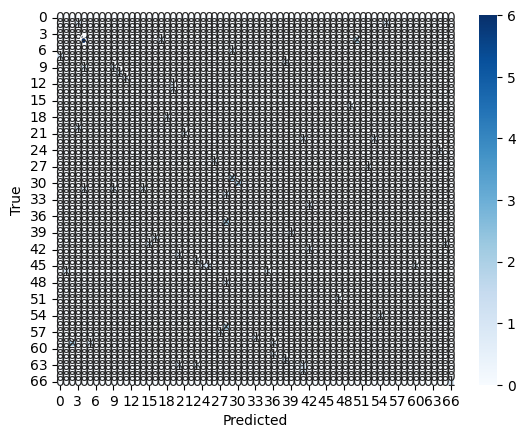

In [ ]:
# ploting out the predictions 

from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(true, pred):
    cm = confusion_matrix(true, pred)
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, y_pred)


In [ ]:
# # Encoding Disease
# from sklearn.preprocessing import LabelEncoder
# le_disease = LabelEncoder()
# data['Disease'] = le_disease.fit_transform(data['Disease'])

# # print the encoded labels
# print("Disease Encoding:", dict(zip(le_disease.classes_, le_disease.transform(le_disease.classes_))))


Disease Encoding: {'Acne': np.int64(0), 'Allergic Rhinitis': np.int64(1), "Alzheimer's Disease": np.int64(2), 'Anemia': np.int64(3), 'Anxiety Disorders': np.int64(4), 'Appendicitis': np.int64(5), 'Asthma': np.int64(6), 'Atherosclerosis': np.int64(7), 'Autism Spectrum Disorder (ASD)': np.int64(8), 'Bipolar Disorder': np.int64(9), 'Bladder Cancer': np.int64(10), 'Brain Tumor': np.int64(11), 'Breast Cancer': np.int64(12), 'Bronchitis': np.int64(13), 'Cataracts': np.int64(14), 'Cerebral Palsy': np.int64(15), 'Chickenpox': np.int64(16), 'Cholecystitis': np.int64(17), 'Cholera': np.int64(18), 'Chronic Kidney Disease': np.int64(19), 'Chronic Obstructive Pulmonary Disease (COPD)': np.int64(20), 'Chronic Obstructive Pulmonary...': np.int64(21), 'Cirrhosis': np.int64(22), 'Colorectal Cancer': np.int64(23), 'Common Cold': np.int64(24), 'Conjunctivitis (Pink Eye)': np.int64(25), 'Coronary Artery Disease': np.int64(26), "Crohn's Disease": np.int64(27), 'Cystic Fibrosis': np.int64(28), 'Dementia': n

In [18]:

bp_mapping = {'Low': 0, 'Normal': 1, 'High': 2}
cholesterol_mapping = {'Low': 0, 'Normal': 1, 'High': 2}

# ordinal encoding to the 'Blood Pressure' and 'Cholesterol Level' columns
data['Blood Pressure'] = data['Blood Pressure'].map(bp_mapping)
data['Cholesterol Level'] = data['Cholesterol Level'].map(cholesterol_mapping)


In [19]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [21]:

binary_mapping = {'No': 0, 'Yes': 1}

binary_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']


for col in binary_columns:
    data[col] = data[col].map(binary_mapping)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Disease               349 non-null    int64  
 1   Fever                 0 non-null      float64
 2   Cough                 0 non-null      float64
 3   Fatigue               0 non-null      float64
 4   Difficulty Breathing  0 non-null      float64
 5   Age                   349 non-null    int64  
 6   Gender                349 non-null    int64  
 7   Blood Pressure        349 non-null    int64  
 8   Cholesterol Level     349 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 24.7 KB


In [23]:
X = data.drop('Disease', axis=1)
y = data['Disease']
print(X)
print(y)






     Fever  Cough  Fatigue  Difficulty Breathing  Age  Gender  Blood Pressure  \
0      NaN    NaN      NaN                   NaN   19       1               0   
1      NaN    NaN      NaN                   NaN   25       1               1   
2      NaN    NaN      NaN                   NaN   25       1               1   
3      NaN    NaN      NaN                   NaN   25       0               1   
4      NaN    NaN      NaN                   NaN   25       0               1   
..     ...    ...      ...                   ...  ...     ...             ...   
344    NaN    NaN      NaN                   NaN   80       1               2   
345    NaN    NaN      NaN                   NaN   85       0               2   
346    NaN    NaN      NaN                   NaN   85       0               2   
347    NaN    NaN      NaN                   NaN   90       1               2   
348    NaN    NaN      NaN                   NaN   90       1               2   

     Cholesterol Level  
0 

In [46]:


# Initialize 
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101], got [  0   1   2   3   4   5   6   7   8   9  13  14  15  16  17  18  19  20
  21  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  64  65  66  67  69  70  71  73  74  75  76  77  78  79
  80  81  82  83  84  85  87  88  89  90  91  92  94  95  96  98  99 101
 102 103 104 105 108 109 110 111 112 113 114 115]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
# # data segragation into numerical and categorical 

# cat_columns = data.columns[data.dtypes =='object']
# cat_columns

In [ ]:
# # model selection
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred, average='weighted'))
# print("Recall:", recall_score(y_test, y_pred, average='weighted'))
# print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# num_columns = data.columns[data.dtypes!='object']
# num_columns


In [ ]:
# data[num_columns]